<a href="https://colab.research.google.com/github/vkjdinesh/Reseacrh/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CNN (CIFAR10)
import numpy as np
import pandas as pd
import math
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
from socket import socket
import seaborn as sns
import skimage.io as io

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available()else "cpu")
device

device(type='cpu')

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.2,0.2, 0.2)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.2,0.2, 0.2)),
])

In [ ]:
trainset = torchvision.datasets.CIFAR10('.', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(
    '.', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
trainset1 = torchvision.datasets.CIFAR10('.', train=True, download=True, transform=transforms.ToTensor())
trainloader1 = torch.utils.data.DataLoader(trainset1, batch_size=32, shuffle=True)

testset1 = torchvision.datasets.CIFAR10( '.', train=False, download=True, transform=transforms.ToTensor())
testloader1 = torch.utils.data.DataLoader(testset1, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(len(trainset1))
print(len(testset1))

50000
10000


In [ ]:
#dataset concatenation
concattrainset = torch.utils.data.ConcatDataset([trainset,trainset1])
print(len(concattrainset))
concattestset = torch.utils.data.ConcatDataset([testset, testset1])
print(len(concattestset))

100000
20000


In [ ]:
#identifying the list of classes
classes = trainset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
#to know the size of the image
img, label = trainset[1000]
img_shape = img.shape
print(img_shape)

torch.Size([3, 32, 32])


In [ ]:
#Data loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([32, 3, 32, 32])


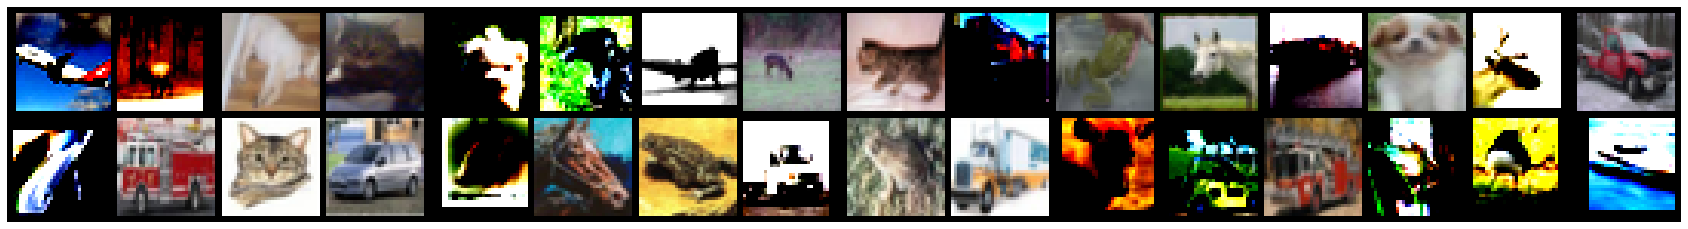

In [ ]:
# to see the batch images from the data loader
for images, label in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(30,30))
    plt.axis('off')
    plt.imshow(torchvision.utils.make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)
    def forward(self,x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = ConvNet()

In [ ]:
model

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

In [ ]:
for epoch in range(4):
  for img, lbl in train_loader:
      img = img.to(device)
      lbl = lbl.to(device)
      optimizer.zero_grad()
      y_pred = model(img)
      #print(y_pred)
      loss = criterion(y_pred, lbl)
      loss.backward()
      optimizer.step()
     # optimizer.zero_grad()
  print(loss)
 


In [ ]:
#trainning and testing
for epoch in range(5):
  for img, lbl in train_loader:
      img = img.to(device)
      lbl = lbl.to(device)
      y_pred = model(img)
      loss = criterion(y_pred, lbl)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
  if epoch%2==0:
      model.eval()
      correct=0
      total=0
      for img,lbl in test_loader:
        img = img.to(device)
        lbl = lbl.to(device)
        y_pred = model(img)
        preds = torch.argmax(y_pred,1)
        correct += (preds == lbl).sum()
        total +=len(lbl)
      print(epoch,  correct/total)    



0 tensor(0.6009)
2 tensor(0.6088)
4 tensor(0.6111)
